## Bifurcations with two parameters - Fish

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.solvers import solve
from sympy import Symbol, im, re, nroots
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import warnings

\begin{equation*}
N'=rN \left( 1- \frac{N}{K} \right) - H\frac{N}{A+N}
\end{equation*}

Where $A ≤ K$ and $A,K,r,H>0$

The first term is the logistic growth term.\
The second term represents the rate at which there are fish removed from the pound by fishing. (not linear).

First we set $x= \frac{N}{K}$, $\tau = rt$, $a = \frac{A}{K}$ and $h = \frac{H}{rK}$, then we can try to get the equation above in another form:

\begin{align*}
\frac{dN}{dt} &= rN \left( 1- \frac{N}{K} \right) - H\frac{N}{A+N}\\
\end{align*}
On the left side we have with $N=xK$ and $t = \frac{\tau}{r}$:
\begin{align*}
 \frac{dN}{dt} = \frac{d(xK)}{dt} = K\frac{dx}{dt} = K\frac{dx}{d\tau}\cdot \frac{d\tau}{dt}  =  K\frac{dx}{d\tau}r = (Kr)\frac{dx}{d\tau} 
\end{align*}

Where we used the chainrule and the fact that $\frac{d\tau}{dt} = r$.
On the right side we tthen have:
\begin{align*}
rN \left( 1- \frac{N}{K} \right) - H\frac{N}{A+N} = r(xK) \left( 1- \frac{(xK)}{K} \right) - (hrK)\frac{(xK)}{(aK)+(xK)} = x(rK) (1-x) - (rK)\frac{hx}{a + x} 
\end{align*}
We know that the results of the left and right side equals each other:
\begin{align*}
(rK)\frac{dx}{d\tau} = x(rK) (1-x) - hx\frac{(rK)}{a + x} 
\end{align*}
\begin{align*}
\implies \frac{dx}{d\tau} = x (1-x) - h\frac{x}{a + x} 
\end{align*}

 From $a=\frac{A}{K}$ and the fact $A$ and $K$ >0, we know that a cant be less than 0. So  a $\in$ ]0,1] (in the assingment on ufora, there stands a<1, but also that A ≤ K, so that means a can be 1. I think this is a little error).\
That way we also know that h > 0.

To determ the equilibria we look at the situation $\frac{dx}{d\tau} =0$.

In [11]:
#First we set some general parameters
amin,amax = 0.01,0.99
hmin,hmax = 0.01,1.0
times = 500
avalues,hvalues = np.linspace(amin,amax,times), np.linspace(hmin,hmax,times)

In [12]:
# This function is for later usage.
def dxdtau(x,a,h):
    return x*(1-x) - (h*x)/(a+x)

def derivative(x,a_val,h):
    return (1-2*x) - (h*a_val)/(a_val+x)**2

In [13]:
#Then we define the variables.
a,x,h = sp.symbols('a x h',real=True)
# the equation to solve for the equilibria
eq = x*(1-x)-(h*x)/(a+x)

solutions = solve(eq,x)
for number,solution in enumerate(solutions):
    print('Solution',number+1,':',solution)

sols_numpy = [np.vectorize(sp.lambdify((a,h),sol,"numpy")) for sol in solutions] #Because we need numpy functions/arrays to plot."""
warnings.filterwarnings("ignore", category=RuntimeWarning)

A,H = np.meshgrid(avalues,hvalues)
xsols = [f(A, H) for f in sols_numpy]

Solution 1 : 0
Solution 2 : -(a - 1)/2 - sqrt(a**2 + 2*a - 4*h + 1)/2
Solution 3 : -(a - 1)/2 + sqrt(a**2 + 2*a - 4*h + 1)/2


In [14]:
def count_solutions(A,xsols):
    count_sols = np.zeros_like(A)
    for xsol in xsols:
        xreal = np.where(np.isreal(xsol), np.real(xsol), np.nan) # the condition that xreal is a real solution, else it gives nan (not a number) back.
        count_sols += (xreal >= 0) #only a positive number of fish excists (but 0 is also acceptable therefore >=0)
    return count_sols

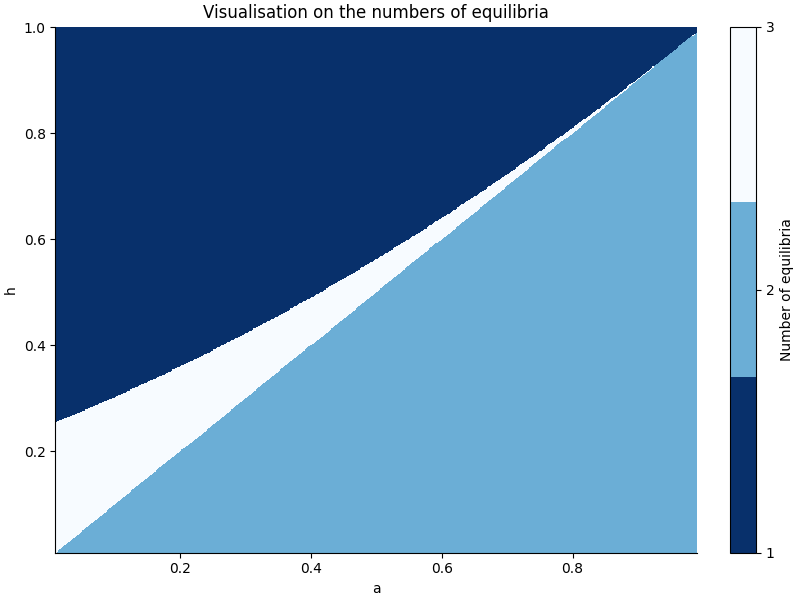

In [15]:
def get_2D_map():
    plt.close('all')
    
    plt.figure(figsize=(8,6))
    plt.pcolormesh(A, H, count_solutions(A,xsols), cmap=plt.get_cmap('Blues_r', 3))
    plt.colorbar(ticks =[0,1,2,3],label="Number of equilibria")
    plt.xlabel("a")
    plt.ylabel("h")
    plt.title("Visualisation on the numbers of equilibria")
    plt.show()

get_2D_map()

This 2D map shows us the number of equilibria depending o 

At first i tried it the same way as the solution of the __Spruce Budworm in 2D__, but the "get_2D_map()" time duration was way to long. So i tried another option without the "get_solution_count_matix()"(from the github biophysics solutions to the exersices).

In the 2D map above, we can see that there are either 1,2 or 3 equilibria depending on the parameters a and h. From this map we can get some important information, like when the parameters h and a are getting closer to a value of one, then the the space where there are two equilibria is getting from a wider area to just a small line. If at the place of that small line (h and a values close to one or even ingeneral) $a>h$, then there is one equilibrium, but if $a<h$, then there are two equilibria (at x=0). 

Also what I mentioned earlier $a,h > 0$ and $a<1$. for h bigger than one there is also no equilibria, because a can't get bigger and as you on the figure above, where h is equal to one and even a bit bigger everything is darkblue (only one equilibrium (again x=0)). So every value of h that is higher than that, there will also have one equilibrium.


#### with a = [0.1,0.2,...1.0]

In [16]:
def plot_branches_for_a(a, ax, hmin,hmax,times):
    h_vals= np.linspace(hmin, hmax, times)
    discriminant= (1.0 + a)**2 - 4.0*h_vals # The discriminant of -x^2 + (1-a)x + (a-h)

    sqrt_discriminant = np.sqrt(np.clip(discriminant, 0, None))
    # The three different solutions we saw earlier
    x0= np.zeros_like(h)
    x_plus= 0.5*((1.0 - a) + sqrt_discriminant)
    x_min= 0.5*((1.0 - a) - sqrt_discriminant)

    x_plus[discriminant < 0] = np.nan  # To not plot the not-real solutions
    x_min[discriminant < 0] = np.nan # Idem
    for arr in (x0, x_plus, x_min):
        arr[arr < 0] = np.nan
    
    def fprime(x): #f'(x)
        return (1.0 - 2.0*x) - (h_vals*a)/((a + x)**2)

    legend=True #to only have the legend once each plot
    
    for x_arr in [x0,x_min,x_plus]:
        fp = fprime(x_arr)
        stable_vals = np.where(fp < 0, x_arr, np.nan)
        unstable_vals = np.where(fp > 0, x_arr, np.nan)
        
        ax.plot(h_vals, stable_vals,color='red', ls='-', lw=1.5, label="stable")
        ax.plot(h_vals, unstable_vals, color='blue' ,ls=':', lw=2.5, label="unstable")
        
        if legend: #to only have the legend once each plot
            ax.legend()
            legend = False

    ax.set_xlabel("h")
    ax.set_ylabel("x (fish)")
    ax.grid(True)

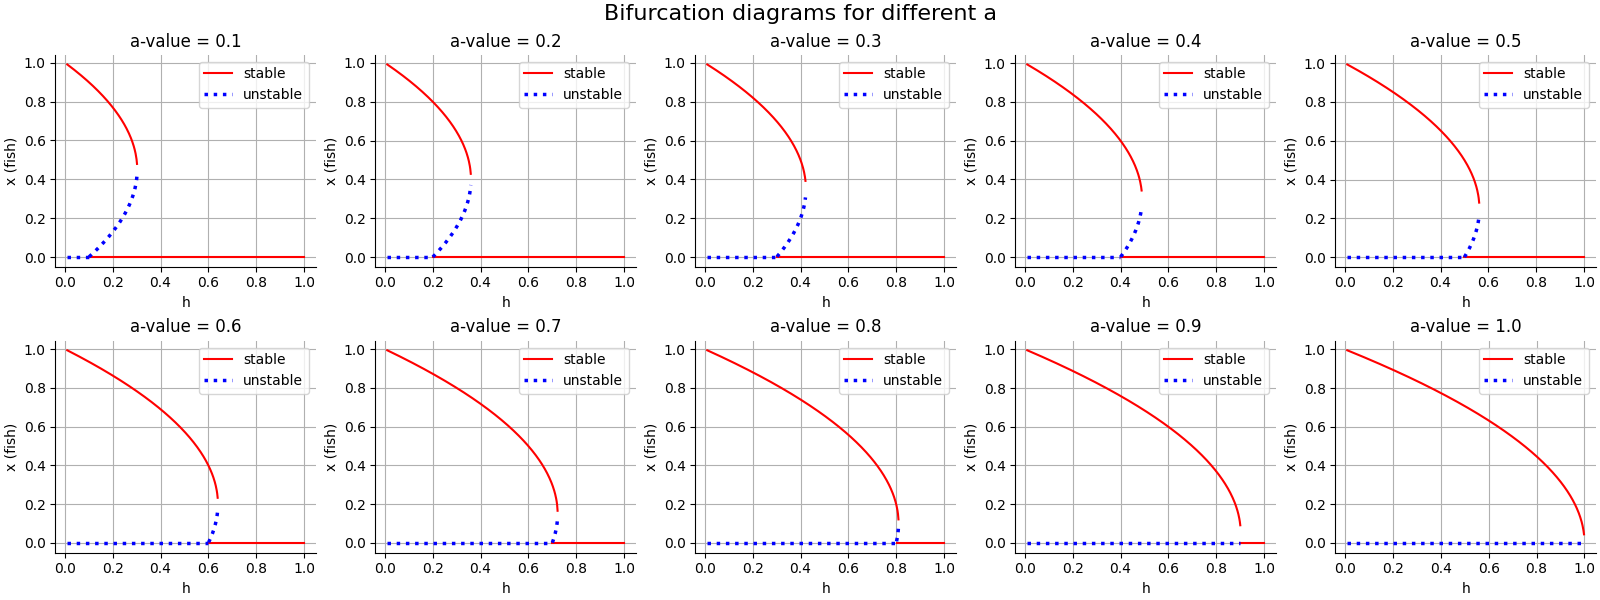

In [19]:
def subfigures():
    plt.close('all')
    a_vals = np.linspace(0.1,1,10) # np.arange(0.1,1.1,0.1) is the other option for the same array.
    fig, axes = plt.subplots(2,5,figsize=(16, 6))
    axes = axes.ravel()  # to make a 1D array
    fig.suptitle("Bifurcation diagrams for different a", fontsize=16)

    for ax,a_val in zip(axes,a_vals):
        ax.set_title(f"a-value = {a_val:.1f}")
        plot_branches_for_a(a_val,ax,hmin,hmax,times)
    plt.show()

subfigures() 

In the figure we see that for greater values of a the equilibrium is stable for a smaller x, except if x is zero. which i find a bit weird, because if x is zero there are no more fishes, then we expect a stable equilibrium. But on the figures we have that sometimes zero fish is unstable which doesnt make sense to me. If there are zero fish we espect it to stay like zero fish and it to be stable, because fish doesn't spawn out of the nowhere. --> After further thinking does it makes sense. It just says that its an equilibrium so there remains no fish. But its unstable if $h<a$ and this means that if someone throws in a few new fish, the population wil grow again to the stable eqquilibrium. And for $h>a$ the new fish i just talked about would immiediately get fished out the pound (because this is a fish pound) and they have no time to reproduce and the population would go to zero again.



The type of bifurcation we have is Transcritical bifurcation (if we cross equilibria it changes from stable to unstable and unstable to stable). \
If a=1 we can't quite know the equilibriam aftere the stable and unstable equilibrium collide because negative x-values (fish) arent physically possible. But if is does there is a chance that a=1 is a pitchfork bifuration.

For small values of a the stable equilibrium changes much faster from stable to unstable (if the fishpopulation is (30-50)% (depending on the a value) of the total begin population). The x-value in the vertival axes is the percentage of the total beginpoopulation of the fish going from 100% to 0%.

What is also important to remark is that the equilibria meet each other on X=0 where h=a.

#### compared to the 2D map:

- On the figures with low values of a we can see that there is a wider interval for h where there are 3 equilibria but if a gets to 1 the interval of h where there are 3 equilibria gets smaller. (we can also see this in the 2D map where the values of 3 equilibria gets smaller if a gets bigger).

- On the 2D map we can see if $h>a$ there is 1 equilibrium. This is also seen on the figures for different a values.

- The same goes for $h<a$ and 2 equilibria as seen on both the 2D map and the figures for different a values.

Another interpretation I made is that if x or the number of fish is log, that the equilibrium turns unstable. My interpretation of this is that then there is more room for the fish and the population will grow again, and because te population grows they are in an unstable equilibrium until they reach the stable equilibrium where they either get fished or there is not enough food so that the population stays stable.

#### The 3D picture of the equilibria.

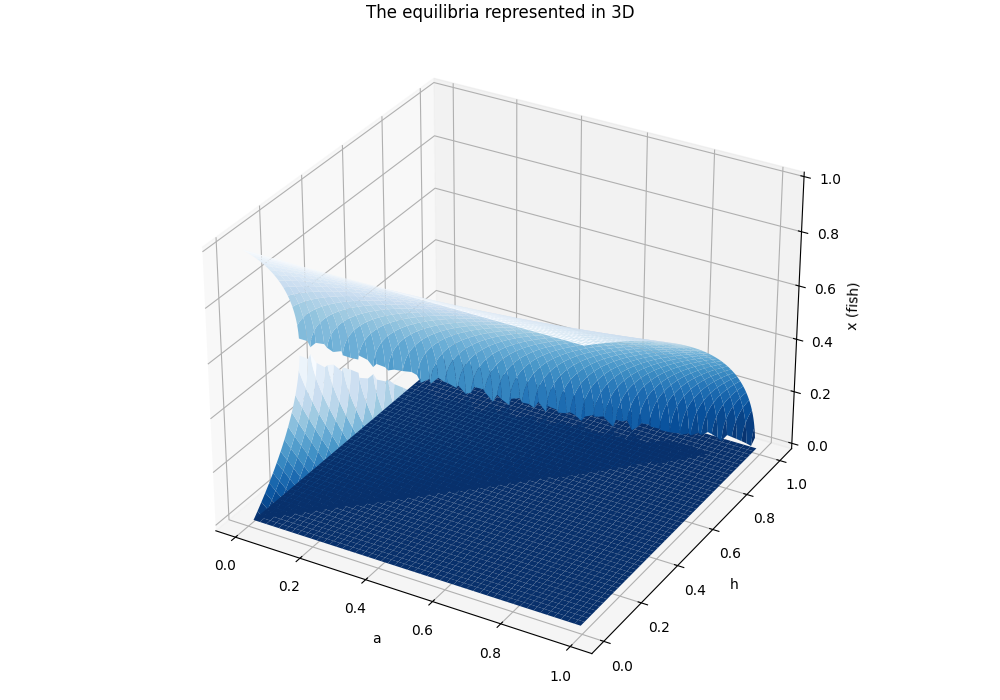

In [27]:
def eq_3D_fig(A,H):
    plt.close()
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    A,H = np.meshgrid(avalues,hvalues)
    xsols = [f(A, H) for f in sols_numpy]

            
            
    for xsol in xsols:
        xreal = np.where(np.isreal(xsol), np.real(xsol), np.nan)
        xplus = np.where(xreal >= 0, xreal, np.nan) #Because there cant be negative fish. zero fish is also posible
        
        ax.plot_surface(A, H, xplus, cmap='Blues_r')

    ax.set_xlabel("a")
    ax.set_ylabel("h")
    ax.set_zlabel("x (fish)")
    ax.set_title("The equilibria represented in 3D")
    plt.show()
eq_3D_fig(A,H)

- The first part of the tipping points on the 3D plot is easy to find, its where we have a line that interrupt our plane (the reason behind that the line isn't as straight as i hoped is because we didn't use more steps (that would slower the proces of plotting it) and i have to be also a bit efficient).

- The second place where we see the tipping points is where $X=0$ and $h=a$ this is easy to see on the figure where the planes cut each other.

For the physical interpratation of the system I refer to what is said just after the figures of different a-values as the interpretation is the same here its just that the different figures there are here sticked togeter in a 3D plot and the a values are the extra dimension.